# Regular Expressions

Google revolutionized the internet by making it extremely searchable. This kind of power is at your fingertips.
Regular expressions are a set of syntatical tools for matching patterns in text. As scientists, we can use this powerful syntax to do many mundane tasks such as finding and sorting files, find and fixing formatting errors, and reformatting data.

- Navigate the command line more efficiently.
- Quickly find files on the command line based on their content (grep).
- Find and replace a complex expression in many files at once (sed).
- Quickly do math on plain-text columns of data from the command line (awk).




## Metacharacters on the Command Line

Metacharacters are characters that have a special meaning aside from their literal
meaning. Literal characters, on the other hand, are those that are being taken at face
value. Regular expressions are strings made of metacharacters and literal characters. Examples of metacharacters:
- Alphanumeric characters match themselves.
- A dot (`.`) matches any character.
- Repeating patterns are matched with `*` , `+` , and `?` .
- Character sets ( `[]` ) and the or operator ( `|` ) can match alternatives.
- The position markers `^` and `$` match the beginning and end of a line, respectively.
- Parentheses can group things and extract information from matches.

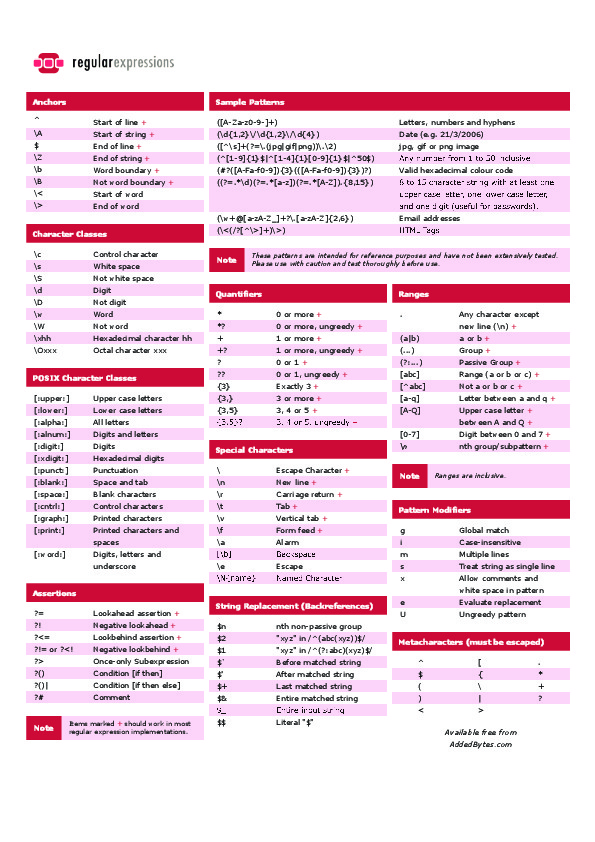

In [1]:
from IPython.display import Image
Image(filename='regular-expressions-cheat-sheet.jpg')

### The wildcard (`*`) --- Zero or more of any character
In the space below, list all files in this directory that end in the extension 'ipynb' on the command line.

In [2]:
# List all files beginning with zero or more of any character, followed by the .ipynb string.
!ls *.ipynb

ch01-the-command-line.ipynb  ch03-containers.ipynb	ch08-regex.ipynb
ch02-python.ipynb	     ch03-containers-pkp.ipynb
ch02-python-pkp.ipynb	     ch04-flow-control.ipynb


### Listing Files with Simple Patterns
Using the ! magic in the notebook, access the terminal.

In [3]:
!ls

ch01-the-command-line.ipynb  DATA
ch02-python.ipynb	     filename
ch02-python-pkp.ipynb	     fubar3
ch03-containers.ipynb	     physics
ch03-containers-pkp.ipynb    __pycache__
ch04-flow-control.ipynb      regular-expressions-cheat-sheet.jpg
ch08-regex.ipynb	     styles
constants.py


In [10]:
# Lets check what is in DATA
!ls -lrth DATA/

total 56K
-rw-r--r-- 1 shahrazad users  11K May  1 10:41 avg_embryo_dist.dat
-rw-r--r-- 1 shahrazad users   53 May  1 10:42 embryodis_c10_n1.dat
-rw-r--r-- 1 shahrazad users   53 May  1 10:42 embryodis_c11_n1.dat
-rw-r--r-- 1 shahrazad users   53 May  1 10:42 embryodis_c12_n1.dat
-rw-r--r-- 1 shahrazad users   53 May  1 10:42 embryodis_c13_n1.dat
-rw-r--r-- 1 shahrazad users   53 May  1 10:42 embryodis_c14_n1.dat
-rw-r--r-- 1 shahrazad users   53 May  1 10:42 embryodis_c15_n1.dat
-rw-r--r-- 1 shahrazad users   53 May  1 10:42 embryodis_c16_n1.dat
-rw-r--r-- 1 shahrazad users   53 May  1 10:42 embryodis_c17_n1.dat
-rw-r--r-- 1 shahrazad users   53 May  1 10:42 embryodis_c18_n1.dat
-rw-r--r-- 1 shahrazad users   53 May  1 10:42 embryodis_c19_n1.dat
drwxr-xr-x 2 shahrazad users 4.0K May  1 10:47 SIZE-1440


In [13]:
# Lets check what is in DATA
!ls -lrth DATA/SIZE-1440/

total 0
-rw-r--r-- 1 shahrazad users 0 May  1 10:47 embryodis_n1.dat
-rw-r--r-- 1 shahrazad users 0 May  1 10:47 embryodis_n19.dat
-rw-r--r-- 1 shahrazad users 0 May  1 10:47 embryodis_n18.dat
-rw-r--r-- 1 shahrazad users 0 May  1 10:47 embryodis_n17.dat
-rw-r--r-- 1 shahrazad users 0 May  1 10:47 embryodis_n16.dat
-rw-r--r-- 1 shahrazad users 0 May  1 10:47 embryodis_n15.dat
-rw-r--r-- 1 shahrazad users 0 May  1 10:47 embryodis_n14.dat
-rw-r--r-- 1 shahrazad users 0 May  1 10:47 embryodis_n13.dat
-rw-r--r-- 1 shahrazad users 0 May  1 10:47 embryodis_n12.dat
-rw-r--r-- 1 shahrazad users 0 May  1 10:47 embryodis_n11.dat
-rw-r--r-- 1 shahrazad users 0 May  1 10:47 embryodis_n10.dat


In [14]:
# To list all files with extension dat in DATA
!ls DATA/*.dat

DATA/avg_embryo_dist.dat   DATA/embryodis_c13_n1.dat  DATA/embryodis_c17_n1.dat
DATA/embryodis_c10_n1.dat  DATA/embryodis_c14_n1.dat  DATA/embryodis_c18_n1.dat
DATA/embryodis_c11_n1.dat  DATA/embryodis_c15_n1.dat  DATA/embryodis_c19_n1.dat
DATA/embryodis_c12_n1.dat  DATA/embryodis_c16_n1.dat


Note that ls goes one level deep into directory, i.e., it does not show all dat files in subdirectories.

### Globally Finding Filenames with Patterns (`find`)
`find` command can recursively search a lot of directories at once. One option is to use it with regular expressions. The syntax is:
```
find [path] -regex "<expression>"
```
With this syntax, the top level of the search will be the indicated . `find` will begin at that location and recursively parse filenames using regular expressions (`-regex`). The expression for which it will seek matches is provided between the double quotes.

In [32]:
!find . -regex ".*\(\.dat\|\.DAT\)"

./DATA/embryodis_c10_n1.dat
./DATA/embryodis_c15_n1.dat
./DATA/embryodis_c19_n1.dat
./DATA/embryodis_c11_n1.dat
./DATA/embryodis_c16_n1.dat
./DATA/embryodis_c14_n1.dat
./DATA/embryodis_c18_n1.dat
./DATA/SIZE-1440/embryodis_n19.dat
./DATA/SIZE-1440/embryodis_n18.dat
./DATA/SIZE-1440/embryodis_n17.dat
./DATA/SIZE-1440/embryodis_n11.dat
./DATA/SIZE-1440/embryodis_n13.dat
./DATA/SIZE-1440/embryodis_n12.dat
./DATA/SIZE-1440/embryodis_n16.dat
./DATA/SIZE-1440/embryodis_n14.dat
./DATA/SIZE-1440/embryodis_n1.dat
./DATA/SIZE-1440/embryodis_n15.dat
./DATA/SIZE-1440/embryodis_n10.dat
./DATA/embryodis_c13_n1.dat
./DATA/avg_embryo_dist.dat
./DATA/embryodis_c17_n1.dat
./DATA/embryodis_c12_n1.dat
./DATA/avg_embryo_dist.DAT


Note that `find` shows all ".dat" files in the path specified and all the subdirectories.

While the wildcard is available on the command line, it doesn’t mean the same thing on the command line that it does in proper regular expression syntax. On the command line, .* means “one dot (.), then zero or more of any character.” In a regex, it means “zero or more of any character (.).”

The dot character (`.`) is a metacharacter in proper regular expressions. For this reason, the backslash is used before the real dot in “.dat” to indicate it should be taken literally.

### REPRESENTING ANY CHARACTER (`.`)

NOTE This bears repeating. On the command line, the dot does not mean “any character.” In proper regular expressions, however, it does. On the command line, the dot already has a special meaning; to represent “any character,” the `?` can be used instead.

In the previous example, assume we want all files start with and have a label number in 10's:

In [21]:
!find . -regex ".*.\(\.dat\|\.DAT\)"

./DATA/embryodis_c10_n1.dat
./DATA/embryodis_c15_n1.dat
./DATA/embryodis_c19_n1.dat
./DATA/embryodis_c11_n1.dat
./DATA/embryodis_c16_n1.dat
./DATA/embryodis_c14_n1.dat
./DATA/embryodis_c18_n1.dat
./DATA/SIZE-1440/embryodis_n19.dat
./DATA/SIZE-1440/embryodis_n18.dat
./DATA/SIZE-1440/embryodis_n17.dat
./DATA/SIZE-1440/embryodis_n11.dat
./DATA/SIZE-1440/embryodis_n13.dat
./DATA/SIZE-1440/embryodis_n12.dat
./DATA/SIZE-1440/embryodis_n16.dat
./DATA/SIZE-1440/embryodis_n14.dat
./DATA/SIZE-1440/embryodis_n1.dat
./DATA/SIZE-1440/embryodis_n15.dat
./DATA/SIZE-1440/embryodis_n10.dat
./DATA/embryodis_c13_n1.dat
./DATA/avg_embryo_dist.dat
./DATA/embryodis_c17_n1.dat
./DATA/embryodis_c12_n1.dat


In [34]:
!find . -regex ".*.embryodis_n1.\(\.dat\|\.DAT\)"

./DATA/SIZE-1440/embryodis_n19.dat
./DATA/SIZE-1440/embryodis_n18.dat
./DATA/SIZE-1440/embryodis_n17.dat
./DATA/SIZE-1440/embryodis_n11.dat
./DATA/SIZE-1440/embryodis_n13.dat
./DATA/SIZE-1440/embryodis_n12.dat
./DATA/SIZE-1440/embryodis_n16.dat
./DATA/SIZE-1440/embryodis_n14.dat
./DATA/SIZE-1440/embryodis_n15.dat
./DATA/SIZE-1440/embryodis_n10.dat
./DATA/SIZE-1440/embryodis_n10.DAT


Indeed, in addition to transforming metacharacters into literals, the ubiquitous backslash transforms many literals into metacharacters.

Examples

end-of-line characters `\n` (linefeed) and `\r` (carriage return)
tab metacharacter `\t`
NULL metacharacter `\0`
whitespace metacharacter `\s`.

In [29]:
!touch file\name

In [30]:
ls *name

filename


In [31]:
!touch file\\name
!ls *name

filename  file\name


### CHARACTER SETS (`[…]`)

A character set matches any one of the enclosed characters.

#### Examples

- Col[ou]mbia Columbia, Colombia
- [Dd]ata Data, data
- [Dd][Aa][Tt][Aa] DATA, data, Data
- 2014[-.]05[-.]10 2014.05.10, 2014-05-10

This makes it easy to avoid worrying about capitalization, varying spellings across the pond, and many other matching issues. In our case, it means that .DAT, .dat, and .data files can all be found with one expression:

In [35]:
!find . -regex ".*.embryodis_n1.\.[Dd][Aa][Tt]"

./DATA/SIZE-1440/embryodis_n19.dat
./DATA/SIZE-1440/embryodis_n18.dat
./DATA/SIZE-1440/embryodis_n17.dat
./DATA/SIZE-1440/embryodis_n11.dat
./DATA/SIZE-1440/embryodis_n13.dat
./DATA/SIZE-1440/embryodis_n12.dat
./DATA/SIZE-1440/embryodis_n16.dat
./DATA/SIZE-1440/embryodis_n14.dat
./DATA/SIZE-1440/embryodis_n15.dat
./DATA/SIZE-1440/embryodis_n10.dat
./DATA/SIZE-1440/embryodis_n10.DAT


### KEY FEATURES OF CHARACTER SETS
Character sets can be specified in shorthand over a range using a hyphen. For letters, [lmnop] is identical to [l-p]. Each set will match any one of the characters “l” through “p” (like the “p” in “zap” or the “l” in “laser”). This works for both numbers and letters. Thus, [0-9] matches any digit.

In [36]:
!find . -regex ".*.embryodis_n1[1-5]\.[Dd][Aa][Tt]"

./DATA/SIZE-1440/embryodis_n11.dat
./DATA/SIZE-1440/embryodis_n13.dat
./DATA/SIZE-1440/embryodis_n12.dat
./DATA/SIZE-1440/embryodis_n14.dat
./DATA/SIZE-1440/embryodis_n15.dat


A character set can indicate characters that we want to avoid. A caret in the square brackets (`[^{...}]`) denotes a negated character set: it will match anything not in the square brackets. For instance, `[\^aeiou]` matches only consonants.

In [37]:
!find . -regex ".*.embryodis_n1[^{3,7}]\.[Dd][Aa][Tt]"

./DATA/SIZE-1440/embryodis_n19.dat
./DATA/SIZE-1440/embryodis_n18.dat
./DATA/SIZE-1440/embryodis_n11.dat
./DATA/SIZE-1440/embryodis_n12.dat
./DATA/SIZE-1440/embryodis_n16.dat
./DATA/SIZE-1440/embryodis_n14.dat
./DATA/SIZE-1440/embryodis_n15.dat
./DATA/SIZE-1440/embryodis_n10.dat
./DATA/SIZE-1440/embryodis_n10.DAT


Character sets can be combined. `[a-zA-Z]` is valid notation matching all letters, irrespective of case.

In [40]:
!find . -regex ".*.embryodis_n1[^{3,7}]\.[a-z]."

In [21]:
!cat fubar3

Introduction to reqular expression


In [20]:
! sed "s/to/TO/g" fubar3           # Search for "to" and replace it with "TO" globally

Introduction TO reqular expression


In [24]:
# First, import the regular expression module.
import re

In [25]:
# The string matches the pattern, so a match is returned.
re.match("20[01][0-9].*[0-9][0-9].*[0-9][0-9]", '2015-12-16')

In [26]:
# Assign the match to a variable name for later use
m = re.match("20[01][0-9].*[0-9][0-9].*[0-9][0-9]", '2015-12-16')

In [27]:
# Find the index in the string of the start of the match.
m.pos

0

In [28]:
# Report all captured groups. This regular expression pattern had no capturing
# parentheses, so no substrings are reported.
m.groups()

()

In [ ]:
# Try to match the date pattern against something that is not a date.
m = re.match("20[01][0-9].*[0-9][0-9].*[0-9][0-9]", 'not-a-date')

In [ ]:
# Note how None is returned when the match fails.
m is None

### The compile() method

To speed up matching multiple strings against a common pattern, it is always a good
idea to compile() the pattern. Compiling takes much longer than matching. However,
once you have a compiled pattern, all of the same functions are available as methods
of the pattern. Since the pattern is already known, you don’t need to pass it in when
you call match() or search() or the other methods. Let’s compile a version of the date
regular expression that has capturing parentheses around the actual date values:

In [ ]:
# Compile the regular expression and store it as the re_date variable.
re_date = re.compile("(20[01][0-9]).*([0-9][0-9]).*([0-9][0-9])")

In [ ]:
# Use this variable to match against a string.
re_date.match('2014-28-01')

In [ ]:
# Assign the match to a variable m for later use.
m = re_date.match('2014-28-01')

In [ ]:
# Since the regular expression uses capturing parentheses, you can obtain the values
# within them using the groups() method. A tuple that has the same length as
# the number of capturing parentheses is returned.
m.groups()

## Regular Expressions Wrap-Up

At this point, your regular expressions skills should include:
- How to speed up command-line use with metacharacters
- How to find files based on patterns in their names (find)
- How to find lines in files based on patterns in their content (grep)
- How to replace text patterns in files (sed)
- How to manipulate columns of data based on patterns (awk)

In [1]:
from IPython.core.display import HTML
def css_styling():
    styles = open("styles/custom.css", "r").read()
    return HTML(styles)
css_styling()